# Rihal Data Science Challenge

You are allowed to use any method in reading, loading, transforming the data. Additionally, you can use any model to predict the price of used cars. 

**Make sure** you explain your approach at each step, and to evaluate your model. Finally, you must show the Mean Asbolute Error from your model's predictions when compared with the test dataset's prices. 

---------------------------

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 110

## Read Data

In [2]:
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

In [3]:
display(df_train.head())
display(df_test.head())

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


In [4]:
df_train['has_warranty'].value_counts()

False    49429
True       571
Name: has_warranty, dtype: int64

<p><strong><span style="font-size: 24px;">Problem description:</span></strong></p>
<p>You have a dataset of used cars&apos; attributes and their prices, the task is to construct a model that predicts the price of a given vehicle.</p>
<p>We start first with Exploratory Data Analysis.</p>

In [5]:
print(df_train.shape)
print(df_test.shape)

(50000, 17)
(27000, 17)


In [6]:
df_train.dtypes

manufacturer_name         object
transmission              object
color                     object
odometer_value             int64
year_produced              int64
engine_fuel               object
engine_type               object
engine_capacity          float64
body_type                 object
has_warranty                bool
ownership                 object
type_of_drive             object
is_exchangeable             bool
number_of_photos           int64
number_of_maintenance      int64
duration_listed            int64
price_usd                float64
dtype: object

## 8 features are categorical while the remaining are numerical

In [7]:
df_train.columns

Index(['manufacturer_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_type', 'engine_capacity',
       'body_type', 'has_warranty', 'ownership', 'type_of_drive',
       'is_exchangeable', 'number_of_photos', 'number_of_maintenance',
       'duration_listed', 'price_usd'],
      dtype='object')

In [8]:
df_train.describe()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,50000.000000,50000.000000,49985.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,249219.881980,2002.945620,2.056894,9.662420,16.256940,80.739440,6654.891274
std,136361.343789,8.067141,0.675106,6.145263,41.537349,113.606476,6467.096697
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8990.000000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


[]

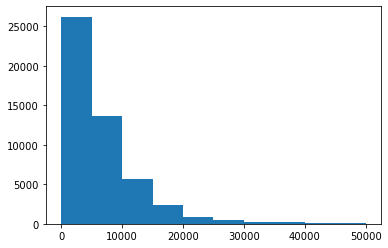

In [9]:
import matplotlib.pyplot as plt
#Histogram of sales price
plt.hist(df_train['price_usd'])
plt.plot()

## Majority of the values lie between 25% and 50% percentile

<AxesSubplot:xlabel='duration_listed', ylabel='price_usd'>

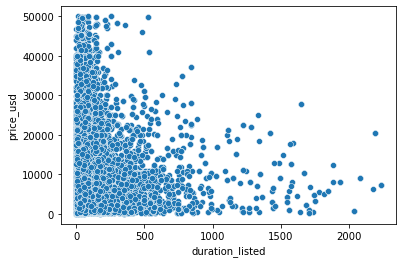

In [10]:
#Scatter plot with duration_listed
sns.scatterplot(x='duration_listed', y='price_usd', data=df_train)

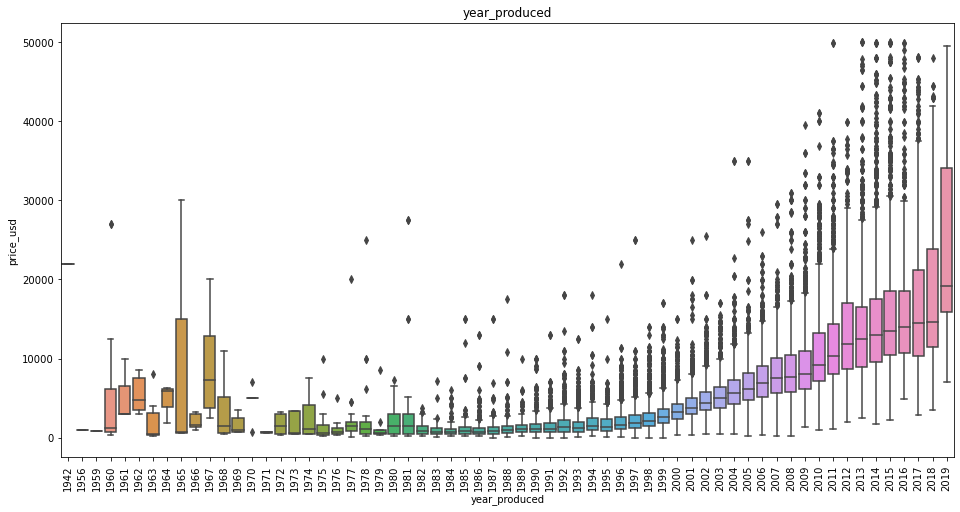

In [11]:
var = 'year_produced'

plt.subplots(figsize=(16, 8))
sns.boxplot(x = var, y = 'price_usd', data=df_train)
plt.title(var)   #matplotlib and seaborn work together in some cases
plt.xticks(rotation=90)
#plt.ylim(0, 800000) 
plt.show()

## Cars produced 2010 and later have the highest mean prices and outliers. 

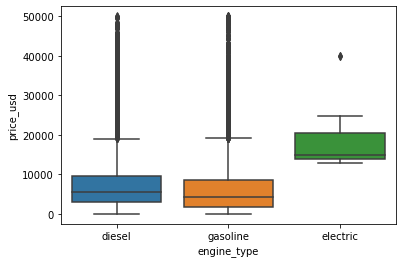

In [12]:
#Box plot for engine type with price

ax = sns.boxplot(x="engine_type", y="price_usd", data=df_train)

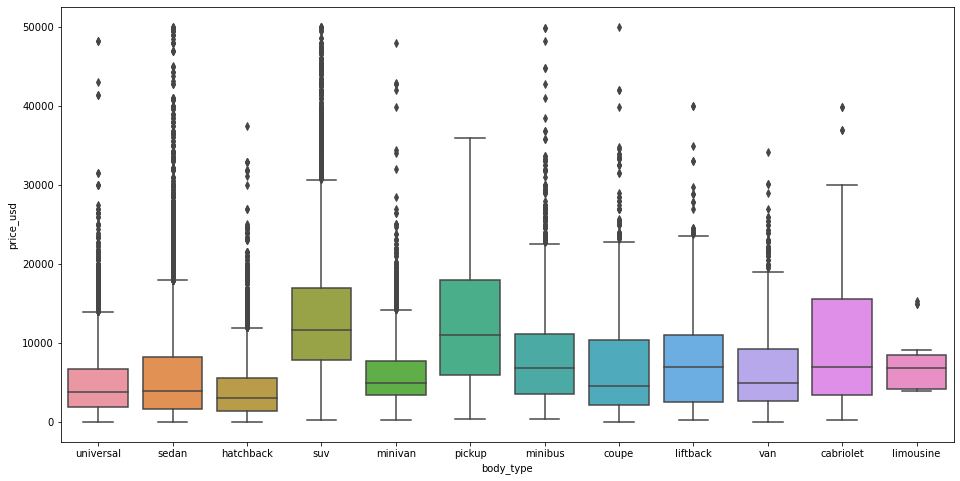

In [13]:
#Box plot for body type with price
plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x="body_type", y="price_usd", data=df_train)

## SUV and pickups seem to have the highest mean, thus more in demand.

# Checking correlation through heatmap

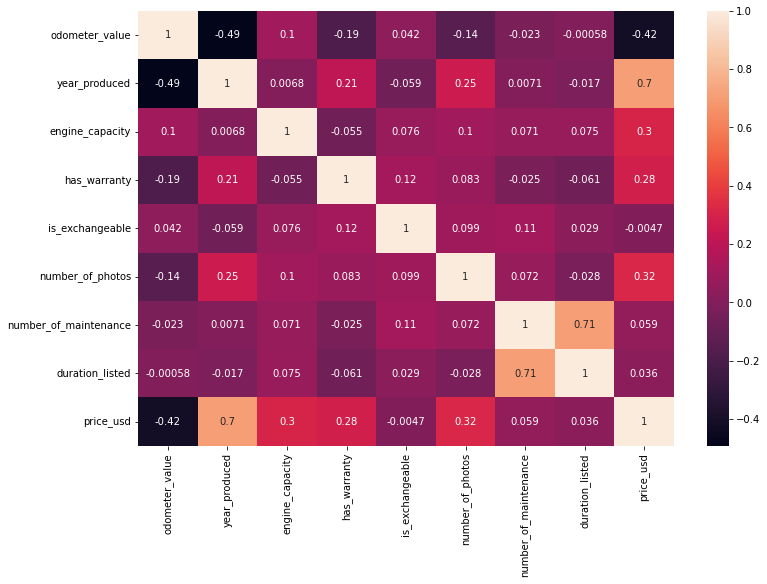

In [14]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(12,8))   
sns.heatmap(corr,annot=True
           )
plt.show()


<p>Correlation heatmap:</p>
<ol>
    <li>Odometer and price have an extreme negative correlation, naturally.</li>
    <li>Year produced have also negative correlation, however, through the box plot earlier we see the relationship is non-linear due to old vehicles of 1960 being considered vintage or collectible with high prices relatively.</li>
    <li>Duration listed &amp; the number of maintenance have a positive correlation, naturally as vehicles with a high number of maintenance undesirable by customers.</li>
</ol>
<p><br></p>

In [15]:
# Finding out missing data 
missing = df_train.isnull().sum().sort_values(ascending=False)
percentage = missing/len(df_train['price_usd'])
missing_data = pd.concat([missing, percentage], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
engine_capacity,15,0.0003
manufacturer_name,0,0.0000
has_warranty,0,0.0000
duration_listed,0,0.0000
number_of_maintenance,0,0.0000
number_of_photos,0,0.0000
is_exchangeable,0,0.0000
type_of_drive,0,0.0000
ownership,0,0.0000
body_type,0,0.0000


In [16]:
#drop the rows that have a null value, since they represent 0.0003 % of the data.
df_train= df_train.dropna(how = 'any')

# Prepare the data for processing.

In [17]:
# Seperate the features and labels
x = df_train.drop(['price_usd'], axis = 1)
y = df_train['price_usd']

<p>Our plan to predict the price will be as follows:</p>
<ol>
    <li>Encode the categorical variables and normalize the values.</li>
    <li>Apply Feature Selection algorithm to improve the performance. reference: <a aria-label="Persistent link using digital object identifier" class="doi" href="https://doi.org/10.1016/j.protcy.2012.02.068" rel="noreferrer noopener" style='box-sizing: border-box; margin: 0px; padding: 0px; background-color: transparent; text-decoration: none; color: rgb(12, 125, 187); word-break: break-word; font-family: NexusSans, Arial, Helvetica, "Lucida Sans Unicode", "Microsoft Sans Serif", "Segoe UI Symbol", STIXGeneral, "Cambria Math", "Arial Unicode MS", sans-serif; font-size: 14px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px;' target="_blank" title="Persistent link using digital object identifier">https://doi.org/10.1016/j.protcy.2012.02.068</a></li>
    <li>Construct & Train different models: Neural Network, SVM, Random Forest, and CatBoost.</li>
    <li>Evaluate Results.</li>
</ol>
<p><br></p>

# Step 1: Categorical Encoding

In [18]:
import category_encoders as encoders
cat_columns= ['manufacturer_name', 'transmission', 'color', 'engine_fuel',
              'engine_type', 'body_type', 'ownership', 'type_of_drive']
#Ordinal encoder will be used
enc_ordinal = encoders.OrdinalEncoder( cols = cat_columns ,verbose=1)
# Transforming the data
x_ordinal_enc= enc_ordinal.fit_transform(x)
x_ordinal_enc.head()
                                    
                               

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed
0,1,1,1,130000,2016,1,1,1.6,1,False,1,1,True,17,38,67
1,2,2,2,149000,2012,2,2,1.6,2,False,1,1,False,9,3,100
2,3,1,2,110000,2014,2,2,1.6,3,False,1,1,False,5,10,91
3,4,1,3,255100,2007,2,2,1.8,3,False,1,1,False,10,4,91
4,5,2,4,650000,1999,2,2,2.0,2,False,1,1,True,5,7,62


In [19]:
from sklearn.preprocessing import MinMaxScaler
#Normalizing the data

#storing the column names
columns = x_ordinal_enc.columns.values.tolist()
#obtain scaled values
scaling = MinMaxScaler().fit(x_ordinal_enc.values)
features_data = scaling.transform(x_ordinal_enc.values)
#replace with scaled values
x_ordinal_enc[columns] = features_data
x_ordinal_enc.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed
0,0.000000,0.0,0.000000,0.1300,0.961039,0.00,0.0,0.179487,0.000000,0.0,0.0,0.0,1.0,0.188235,0.029088,0.030018
1,0.018519,1.0,0.090909,0.1490,0.909091,0.25,1.0,0.179487,0.090909,0.0,0.0,0.0,0.0,0.094118,0.001572,0.044803
2,0.037037,0.0,0.090909,0.1100,0.935065,0.25,1.0,0.179487,0.181818,0.0,0.0,0.0,0.0,0.047059,0.007075,0.040771
3,0.055556,0.0,0.181818,0.2551,0.844156,0.25,1.0,0.205128,0.181818,0.0,0.0,0.0,0.0,0.105882,0.002358,0.040771
4,0.074074,1.0,0.272727,0.6500,0.740260,0.25,1.0,0.230769,0.090909,0.0,0.0,0.0,1.0,0.047059,0.004717,0.027778


In [20]:
# Create test and validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_ordinal_enc, y, test_size = 0.1, random_state= 42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(44986, 16) (4999, 16) (44986,) (4999,)


<p><span style="font-family: Georgia, serif; font-size: 18px;">Step 2: Feature Selection</span></p>
<p><span style="font-size: 18px; line-height: 142%; font-family: Georgia, serif;">Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.</span></p>
<p><span style="font-family: Georgia, serif; font-size: 18px;">Using Sklearn RFECV method we can apply RFE with 10 cross-validations to figure the optimal number of features with the highest score.</span></p>

In [201]:
from sklearn import svm
# RFE is wrapper feature selection method, it requires a linear estimator. SVM with linear kernal will be used.
cl = svm.SVR(C=10, degree=2, gamma=0.05, kernel= 'linear')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
min_features_to_select = 2  # Minimum number of features to consider
rfecv_svm = RFECV(
    estimator=cl,
    
    cv=KFold(5,shuffle=True,),
    scoring="neg_mean_absolute_error",
    
    min_features_to_select=min_features_to_select, n_jobs=-1
)
rfecv_svm.fit(x_train, y_train)

In [ ]:
print("Optimal number of features : %d" % rfecv_svm.n_features_)

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv_svm.grid_scores_) + min_features_to_select),
    rfecv_svm.grid_scores_,
)
plt.show()

## It appears that the current number of features is optimal therefore no features will be dropped.

# Step 3: Construct Different Models

In [21]:
from sklearn import metrics
#define a dunction to print MAE and MSE
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('__________________________________')
    
# this function return the actual values of mae and mse
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)

    return mae, mse

## Applying Support Vector Machine

In [23]:
from sklearn import svm
#SVR is called because this is a regression problem
cl = svm.SVR(C=1500, degree=2, gamma=0.05, kernel= 'rbf')
cl.fit(x_train, y_train)


SVR(C=1500, degree=2, gamma=0.05)

In [27]:
test_pred = cl.predict(x_val)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_val, test_pred)

#Creating a table to record the results
results_df = pd.DataFrame(data=[["Support Vector Machine", *evaluate(y_val, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE'])

Test set evaluation:
_____________________________________
MAE: 1966.077826306146
MSE: 11046468.90807746
__________________________________


# Applying Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs= -1)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [30]:
test_pred = rf_reg.predict(x_val)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_val, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest", *evaluate(y_val, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 736.4413326269345
MSE: 2174978.589774171
__________________________________


C:\Users\Al-Hassan\AppData\Local\Temp\ipykernel_12784\546640911.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# Applying Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
# transform data into arrays
X_train = np.array(x_train)
X_test = np.array(x_val)
y_train = np.array(y_train)
y_test = np.array(y_val)
#define the model
model = Sequential()
# define input layer
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

r = model.fit(x_train, y_train,
              validation_data=(x_val,y_val),
              batch_size=10,
              epochs=10)

Epoch 1/10
4499/4499 [==============================] - 14s 3ms/step - loss: 16633588.0000 - mse: 16633588.0000 - mae: 2619.8955 - val_loss: 9264161.0000 - val_mse: 9264161.0000 - val_mae: 2000.3282
Epoch 2/10
4499/4499 [==============================] - 13s 3ms/step - loss: 10184019.0000 - mse: 10184019.0000 - mae: 2016.8232 - val_loss: 7740106.0000 - val_mse: 7740106.0000 - val_mae: 1731.0745
Epoch 3/10
4499/4499 [==============================] - 13s 3ms/step - loss: 9077151.0000 - mse: 9077152.0000 - mae: 1901.8701 - val_loss: 6899019.0000 - val_mse: 6899018.5000 - val_mae: 1640.7144
Epoch 4/10
4499/4499 [==============================] - 14s 3ms/step - loss: 8617251.0000 - mse: 8617251.0000 - mae: 1851.3303 - val_loss: 6843822.0000 - val_mse: 6843822.0000 - val_mae: 1802.1315
Epoch 5/10
4499/4499 [==============================] - 14s 3ms/step - loss: 8182351.5000 - mse: 8182351.5000 - mae: 1807.7812 - val_loss: 6648032.0000 - val_mse: 6648032.0000 - val_mae: 1658.3529
Epoch 6/10


In [33]:
test_pred = model.predict(x_val)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Neural Network", *evaluate(y_val, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1678.5763877941604
MSE: 6165820.65494037
__________________________________


C:\Users\Al-Hassan\AppData\Local\Temp\ipykernel_12784\899480975.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# Applying CatBoost 

In [34]:
from catboost import CatBoostRegressor, Pool, cv
cat = CatBoostRegressor(iterations=300, loss_function='MAE', depth=10, l2_leaf_reg=9,learning_rate=0.9 )
# train the model
cat.fit(x_train,
          y_train,
          
          eval_set=(x_val, y_val),

          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2061.5192907	test: 2011.8576296	best: 2011.8576296 (0)	total: 170ms	remaining: 50.7s
1:	learn: 1659.2619095	test: 1669.2011017	best: 1669.2011017 (1)	total: 205ms	remaining: 30.5s
2:	learn: 1514.7993865	test: 1530.8401898	best: 1530.8401898 (2)	total: 240ms	remaining: 23.7s
3:	learn: 1396.7492221	test: 1450.3668883	best: 1450.3668883 (3)	total: 275ms	remaining: 20.3s
4:	learn: 1354.4773436	test: 1413.4241411	best: 1413.4241411 (4)	total: 309ms	remaining: 18.2s
5:	learn: 1296.4759944	test: 1371.8496307	best: 1371.8496307 (5)	total: 343ms	remaining: 16.8s
6:	learn: 1258.2964735	test: 1329.2932231	best: 1329.2932231 (6)	total: 380ms	remaining: 15.9s
7:	learn: 1212.2815448	test: 1307.0716511	best: 1307.0716511 (7)	total: 415ms	remaining: 15.2s
8:	learn: 1203.2061968	test: 1306.4162345	best: 1306.4162345 (8)	total: 452ms	remaining: 14.6s
9:	learn: 1193.0888571	test: 1298.3930404	best: 1298.3930404 (9)	total: 488ms	remaining: 14.1s
10:	learn: 1173.0203724	test: 1279.2824064	best: 1

87:	learn: 718.4360072	test: 1115.9368305	best: 1115.9368305 (87)	total: 3.33s	remaining: 8.01s
88:	learn: 717.2388417	test: 1114.2417933	best: 1114.2417933 (88)	total: 3.36s	remaining: 7.96s
89:	learn: 714.3999449	test: 1111.8792146	best: 1111.8792146 (89)	total: 3.39s	remaining: 7.9s
90:	learn: 713.3000665	test: 1110.4556600	best: 1110.4556600 (90)	total: 3.42s	remaining: 7.87s
91:	learn: 712.0083353	test: 1110.7100547	best: 1110.4556600 (90)	total: 3.46s	remaining: 7.82s
92:	learn: 709.6170926	test: 1107.1761466	best: 1107.1761466 (92)	total: 3.49s	remaining: 7.77s
93:	learn: 708.4845250	test: 1106.0392040	best: 1106.0392040 (93)	total: 3.52s	remaining: 7.71s
94:	learn: 705.1725482	test: 1106.4925244	best: 1106.0392040 (93)	total: 3.55s	remaining: 7.67s
95:	learn: 703.3716710	test: 1105.8013615	best: 1105.8013615 (95)	total: 3.58s	remaining: 7.62s
96:	learn: 701.8815644	test: 1105.2916480	best: 1105.2916480 (96)	total: 3.61s	remaining: 7.56s
97:	learn: 698.2714361	test: 1103.2598011

172:	learn: 611.3480853	test: 1089.1366621	best: 1088.9518446 (168)	total: 6.29s	remaining: 4.62s
173:	learn: 610.5536245	test: 1089.9447949	best: 1088.9518446 (168)	total: 6.32s	remaining: 4.58s
174:	learn: 609.2487406	test: 1090.5221488	best: 1088.9518446 (168)	total: 6.36s	remaining: 4.54s
175:	learn: 608.7989003	test: 1090.1324034	best: 1088.9518446 (168)	total: 6.39s	remaining: 4.5s
176:	learn: 604.7601912	test: 1087.9710180	best: 1087.9710180 (176)	total: 6.42s	remaining: 4.46s
177:	learn: 603.7570575	test: 1087.8884530	best: 1087.8884530 (177)	total: 6.46s	remaining: 4.42s
178:	learn: 602.9392492	test: 1087.6530587	best: 1087.6530587 (178)	total: 6.49s	remaining: 4.39s
179:	learn: 602.0256247	test: 1088.3064936	best: 1087.6530587 (178)	total: 6.53s	remaining: 4.35s
180:	learn: 600.9939366	test: 1088.5004590	best: 1087.6530587 (178)	total: 6.56s	remaining: 4.31s
181:	learn: 600.8225595	test: 1088.3523120	best: 1087.6530587 (178)	total: 6.59s	remaining: 4.27s
182:	learn: 600.14674

259:	learn: 553.5487712	test: 1070.2665184	best: 1070.2665184 (259)	total: 9.23s	remaining: 1.42s
260:	learn: 553.3442613	test: 1070.1978337	best: 1070.1978337 (260)	total: 9.26s	remaining: 1.38s
261:	learn: 552.7390879	test: 1070.0496052	best: 1070.0496052 (261)	total: 9.29s	remaining: 1.35s
262:	learn: 551.8838452	test: 1069.2531338	best: 1069.2531338 (262)	total: 9.32s	remaining: 1.31s
263:	learn: 551.6496503	test: 1069.2270466	best: 1069.2270466 (263)	total: 9.35s	remaining: 1.27s
264:	learn: 551.5373835	test: 1069.5007570	best: 1069.2270466 (263)	total: 9.38s	remaining: 1.24s
265:	learn: 550.8587197	test: 1068.8565535	best: 1068.8565535 (265)	total: 9.41s	remaining: 1.2s
266:	learn: 550.5436584	test: 1067.3455714	best: 1067.3455714 (266)	total: 9.44s	remaining: 1.17s
267:	learn: 549.8878862	test: 1066.5754789	best: 1066.5754789 (267)	total: 9.47s	remaining: 1.13s
268:	learn: 548.0689000	test: 1066.4841373	best: 1066.4841373 (268)	total: 9.52s	remaining: 1.1s
269:	learn: 547.963441

In [35]:
test_pred = cat.predict(x_val)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["CatBoost Model", *evaluate(y_val, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1061.1124305260762
MSE: 4469086.923577022
__________________________________


C:\Users\Al-Hassan\AppData\Local\Temp\ipykernel_12784\943217398.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


# Step 4: Evaluating Results

In [36]:
results_df

,Model,MAE,MSE
0,Support Vector Machine,1966.077826,1.104647e+07
1,Random Forest,736.441333,2.174979e+06
2,Neural Network,1678.576388,6.165821e+06
3,CatBoost Model,1061.112431,4.469087e+06


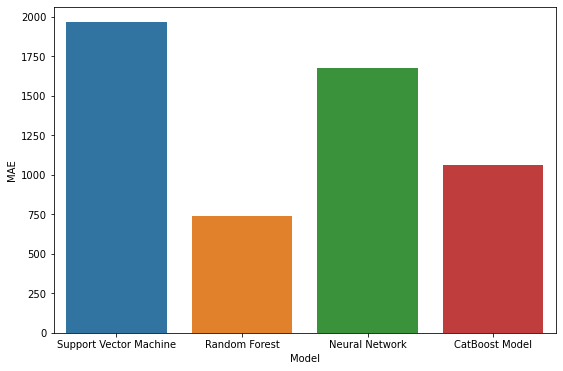

In [45]:
plt.subplots(figsize=(9, 6))
ax = sns.barplot(x="Model", y="MAE", data=results_df)

<p><span style="font-size: 18px; font-family: Georgia, serif;">We find that Random Forest achieves the lowest Mean Absolute Error.&nbsp;</span></p>
<p><span style="font-family: Georgia, serif; font-size: 18px;">Possible approaches to explore are applying other feature selection methods such as embedded methods or wrapper methods to check if results remain consistence. Additionally, hyper-parameter optimization techniques can be explored such as grid search, however, since the size of the problem makes grid search inefficient other alternatives such as genetic algorithm can be explored as well.</span></p>
<p><br></p>